<a href="https://colab.research.google.com/github/ShakthivelNadar/Fake-News-Detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
fake_news = pd.read_csv("/content/drive/MyDrive/Fake.csv")
real_news = pd.read_csv("/content/drive/MyDrive/True.csv")

print("Fake News Shape:", fake_news.shape)
print("Real News Shape:", real_news.shape)

fake_news.head()

Fake News Shape: (23481, 4)
Real News Shape: (21417, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake_news['label'] = 1   # Fake news
real_news['label'] = 0   # Real news

data = pd.concat([fake_news, real_news], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

print(data[['title', 'label']].head())

                                               title  label
0  CONGRESS JUST DEALT A BIG BLOW To Obama And Hi...      1
1  Trump vows to 'win' against opioid epidemic, o...      0
2  Russian foreign ministry: Moscow ready to coop...      0
3  Speaker of Ethiopian parliament submits resign...      0
4  U.S., Germany urge China to release jailed act...      0


In [4]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = "".join(char for char in text if char not in string.punctuation)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [5]:
data['text'] = data['text'].apply(clean_text)

In [6]:
X = data['text']
y = data['label']


In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (44898, 5000)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9889755011135858

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4312
           1       0.99      0.99      0.99      4668

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



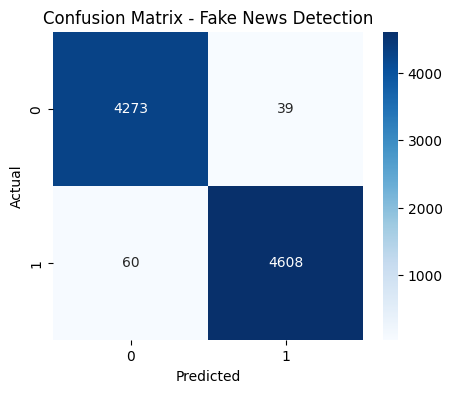

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fake News Detection")
plt.show()

In [12]:
def predict_news(news_text):
    cleaned_text = clean_text(news_text)
    vector = tfidf.transform([cleaned_text])
    prediction = model.predict(vector)
    return "Fake News" if prediction[0] == 1 else "Real News"

print(predict_news("Government announces new education reforms"))

Fake News


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 98.9 %
